# Student Result Analyzer — EDA
Author: Pradeep Aili  
Project: Student Result Analyzer using Python, Pandas & Matplotlib  
Goal: Explore student marks dataset, perform cleaning, compute totals/averages/grades, identify toppers and weak          subjects, and create visualizations.

In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
BASE_DIR = os.path.abspath("../")  # adjust if notebook is in repo root vs notebooks/
DATA_PATH = os.path.join(BASE_DIR, "data", "students_marks.csv")
OUTPUT_DIR = os.path.join(BASE_DIR, "outputs")
PLOTS_DIR = os.path.join(OUTPUT_DIR, "plots")
os.makedirs(PLOTS_DIR, exist_ok=True)

# Display settings
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")


In [7]:
df = pd.read_csv(DATA_PATH)
df.head()

,StudentID,Name,Math,Physics,Chemistry,English,Computer
0,S001,Arjun,78,85,67,72,90
1,S002,Pradeep,88,92,80,85,78
2,S003,Rahul,88,92,80,85,78
3,S004,Sneha,65,70,60,68,55
4,S005,Neha,92,89,95,90,93


## Dataset Info
- Show basic info, datatypes, null counts and shape.


In [8]:
print("Shape:", df.shape)
display(df.info())
display(df.isnull().sum())

Shape: (6, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StudentID  6 non-null      object
 1   Name       6 non-null      object
 2   Math       6 non-null      int64 
 3   Physics    6 non-null      int64 
 4   Chemistry  6 non-null      int64 
 5   English    6 non-null      int64 
 6   Computer   6 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 464.0+ bytes


None

StudentID    0
Name         0
Math         0
Physics      0
Chemistry    0
English      0
Computer     0
dtype: int64

In [3]:
subject_cols = [c for c in df.columns if c not in ("StudentID","Name")]
# ensure numeric
for c in subject_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
# fill missing with median (explicit assignment to avoid chained assignment warning)
df[subject_cols] = df[subject_cols].fillna(df[subject_cols].median())
# drop duplicates (if any)
df = df.drop_duplicates()
df.isnull().sum()

StudentID    0
Name         0
Math         0
Physics      0
Chemistry    0
English      0
Computer     0
dtype: int64

## Cleaning
- Convert marks to numeric, fill missing values with median (safe method), and remove duplicates if any.


In [9]:
subject_cols = [c for c in df.columns if c not in ("StudentID","Name")]
# Ensure numeric and fill na (non-inplace to avoid pandas chained assignment warning)
for c in subject_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c] = df[c].fillna(df[c].median())

# Drop duplicates (if any)
df = df.drop_duplicates()
df.head()


,StudentID,Name,Math,Physics,Chemistry,English,Computer
0,S001,Arjun,78,85,67,72,90
1,S002,Pradeep,88,92,80,85,78
2,S003,Rahul,88,92,80,85,78
3,S004,Sneha,65,70,60,68,55
4,S005,Neha,92,89,95,90,93


In [10]:
df["Total"] = df[subject_cols].sum(axis=1)
df["Average"] = df[subject_cols].mean(axis=1).round(2)

def grade(avg):
    if avg >= 90: return "A+"
    if avg >= 80: return "A"
    if avg >= 70: return "B+"
    if avg >= 60: return "B"
    if avg >= 50: return "C"
    return "D"

df["Grade"] = df["Average"].apply(grade)
df.head()


,StudentID,Name,Math,Physics,Chemistry,English,Computer,Total,Average,Grade
0,S001,Arjun,78,85,67,72,90,392,78.4,B+
1,S002,Pradeep,88,92,80,85,78,423,84.6,A
2,S003,Rahul,88,92,80,85,78,423,84.6,A
3,S004,Sneha,65,70,60,68,55,318,63.6,B
4,S005,Neha,92,89,95,90,93,459,91.8,A+


## Export Summary
Save a CSV summary of results for later use.


In [11]:
os.makedirs(OUTPUT_DIR, exist_ok=True)
summary_csv = os.path.join(OUTPUT_DIR, "summary.csv")
df.to_csv(summary_csv, index=False)
print("Saved:", summary_csv)


Saved: c:\student-result-analyzer\outputs\summary.csv


## Top performers
Plot top N students by total marks.


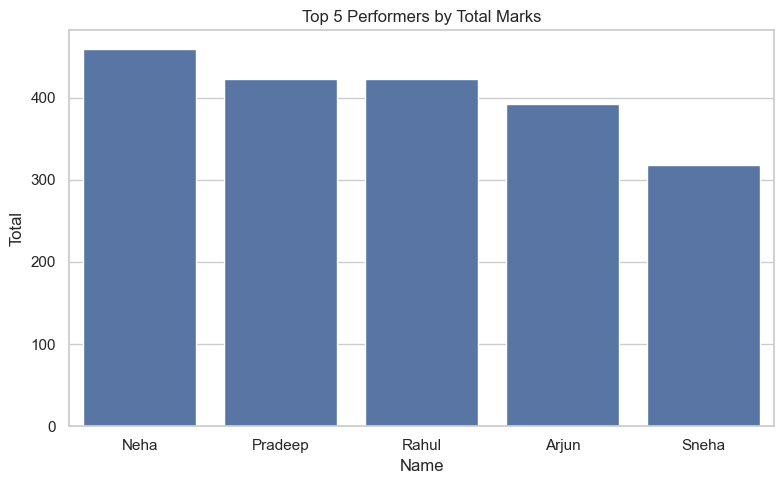

In [12]:
top_n = 5
top_df = df.sort_values("Total", ascending=False).head(top_n)
plt.figure(figsize=(8,5))
sns.barplot(x="Name", y="Total", data=top_df)
plt.title(f"Top {top_n} Performers by Total Marks")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "top_performers.png"))
plt.show()


## Subject-wise averages


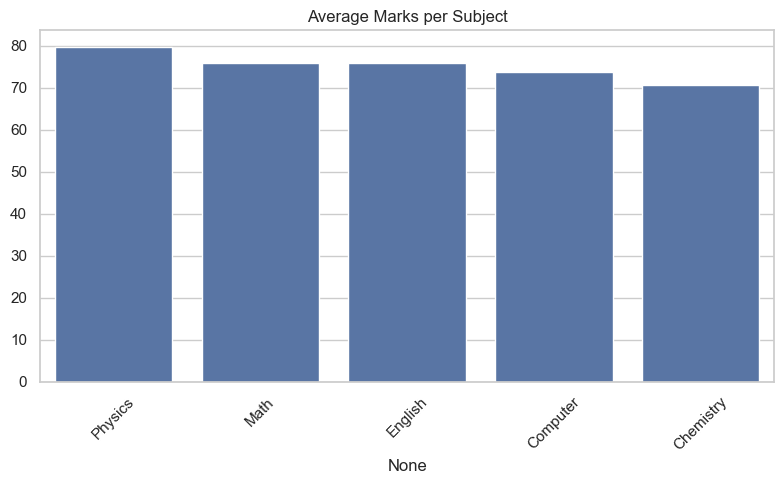

In [14]:
subject_means = df[subject_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=subject_means.index, y=subject_means.values)
plt.xticks(rotation=45)
plt.title("Average Marks per Subject")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "subject_average.png"))
plt.show()


## Grade distribution


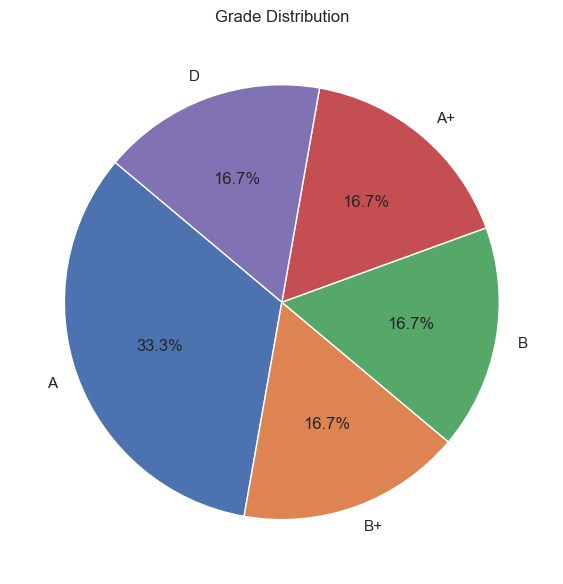

In [18]:
grade_counts = df["Grade"].value_counts()
plt.figure(figsize=(6,6))
grade_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140)
plt.title("Grade Distribution")
plt.ylabel("")
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, "grade_distribution.png"))
plt.show()


## Weak areas & Conclusion
- Find subjects with lowest average
- Provide recommendations (extra practice, focus areas)


In [19]:
weak_subjects = subject_means.tail(2)  # last 2 subjects with lowest avg
print("Weak subjects (need focus):")
display(weak_subjects)


Weak subjects (need focus):


Computer     73.666667
Chemistry    70.666667
dtype: float64

## Next steps
- Add normalization / percentiles / rank columns
- Build a Streamlit dashboard for interactive view
- Add semester-wise or year-wise comparison
